<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 16, 2016: `expt` $g$ polys
<br>November 10, 2016: `inverse` and `power` $g$ polys
<br>November 9, 2016: splitting from "big" notebook
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Theory of matrix functions, with applications to a symbolic Riordan array $\mathcal{R}$ defined by convolutions.
</div>

In [1]:
from sympy import *
from sympy.abc import n, i, N, x, lamda, phi, z, j, r, k, a, t, alpha
from sympy.functions.elementary.integers import ceiling, floor

init_printing()

In [2]:
%run ../../src/matrix_functions.py
%run ../../src/sequences.py

In [3]:
d = IndexedBase('d')

---

# $\mathcal{R}$ is a symbolic Riordan array

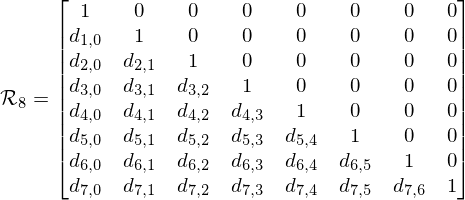

In [4]:
m=8
R = Eq(Symbol(r'\mathcal{{R}}_{{ {} }}'.format(m)), 
       Matrix(m, m, riordan_matrix_by_recurrence(m, lambda n, k: {(n, k):1 if n == k else d[n, k]})), evaluate=False)
R

In [5]:
eigendata = spectrum(R)
eigendata

In [6]:
data, eigenvals, multiplicities = eigendata.rhs 

In [7]:
Phi_poly = Phi_poly_ctor(deg=m-1)
Phi_poly

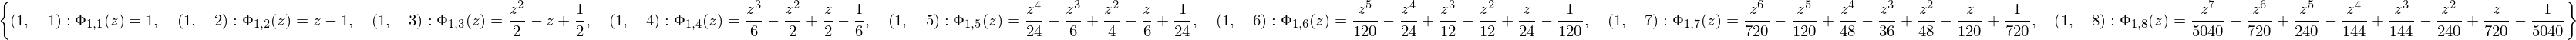

In [8]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

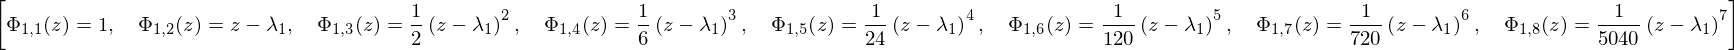

In [9]:
[p.factor() for p in component_polynomials(eigendata, early_eigenvals_subs=False).values()]

In [10]:
Z = IndexedBase('Z') # to be ported, discard them for now

cmatrices = component_matrices(R, Phi_polynomials)
# {Z[k]:v for k,v in cmatrices.items()} # all of them

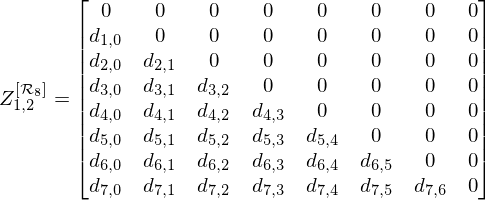

In [11]:
cmatrices[1,2]

# `sqrt` function

In [30]:
f = Function('f')
f_sqrt = define(let=f(z), be=sqrt(z))
f_sqrt

In [31]:
order = 10

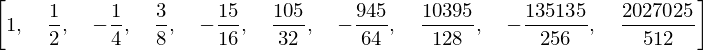

In [32]:
[f_sqrt.rhs.diff(z, j, 1).subs({z:1}) for j in range(order)]

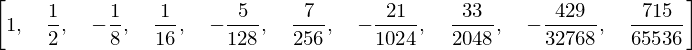

In [33]:
[f_sqrt.rhs.diff(z, j, 1).subs({z:1})/factorial(j) for j in range(order)]

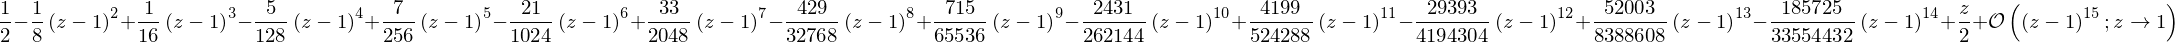

In [34]:
series(f_sqrt.rhs, z,1, n=15)

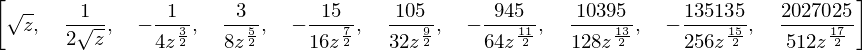

In [35]:
[f_sqrt.rhs.diff(z, j, 1) for j in range(order)]

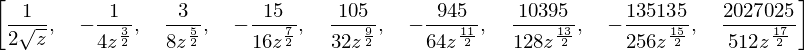

In [36]:
[(-1)**n*factorial(2*(n))/(factorial(n)*2**n)/(2**(n+1)*z**((2*n+1)/S(2))) for n in range(order-1)]

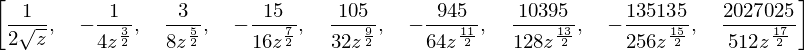

In [37]:
[(-1)**n*factorial(2*(n))/(factorial(n)*4**n)/(2*z**((2*n+1)/S(2))) for n in range(order-1)]

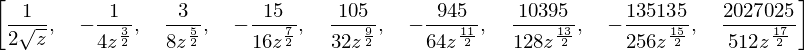

In [38]:
[(-1)**n*binomial(2*n, n)*factorial(n)/(2*4**n)/(z**((2*n+1)/S(2))) for n in range(order-1)]

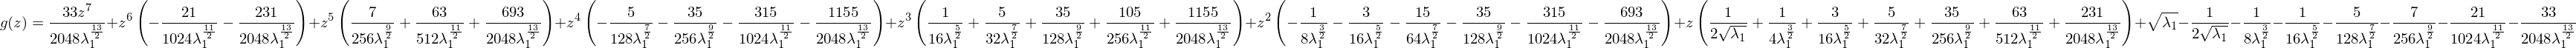

In [39]:
g_sqrt = g_poly(f_sqrt, eigendata, Phi_polynomials)
g_sqrt

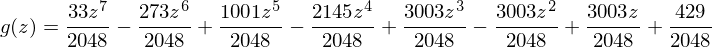

In [40]:
g_sqrt = g_sqrt.subs(eigenvals)
g_sqrt

Checking *Equation 7*

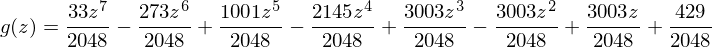

In [41]:
gg = define(Function('g')(z), 1 - sum(S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1)*binomial(j, k)*(-z)**(k)
                                      for j in range(1, m) for k in range(j+1))/2) 
      
gg

In [44]:
Eq(g_sqrt.rhs, gg.rhs)

Checking *Equation 8*

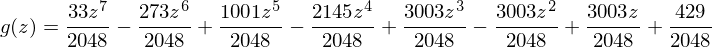

In [45]:
ggg = define(Function('g')(z), 
             1 
             -sum(S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1)*binomial(j, k)*(-z)**(k) 
                  for k in range(1,m)
                  for j in range(k, m))/2 
             -sum(S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1) for j in range(1,m))/2)
ggg

In [46]:
Eq(g_sqrt.rhs, ggg.rhs)

Checking *Equation 9*

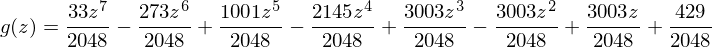

In [47]:
gggg = define(Function('g')(z), 1
       - sum(S(1)/(j*4**(j-1))*binomial(2*(j-1), j-1)*binomial(j, k)*(-z)**(k) 
           for k in range(m)
           for j in range(k+KroneckerDelta(k,0), m))/2)
gggg

In [48]:
Eq(g_sqrt.rhs, gggg.rhs)

Checking *Equation 10*

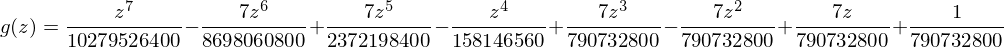

In [71]:
ggggg = define(Function('g')(z), S(2)/(4**m*(2*m-1)*binomial(2*m, m))*
              sum(S(k-m)/(2*k-1)*binomial(m, k)*(-z)**(k) for k in range(1,m))
              + S(2)*m/(4**m*(2*m-1)*binomial(2*m, m)))
ggggg

In [69]:
Eq(g_sqrt.rhs, gggg.rhs)

# `expt` function

In [9]:
f = Function('f')
f_expt = define(let=f(z), be=exp(alpha*z))
f_expt

In [10]:
[f_expt.rhs.diff(z, i) for i in range(11)]

In [11]:
powdenest((-1)**(j-1)*alpha**(j-1), force=True)

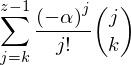

In [12]:
ss = Sum((-alpha)**j*binomial(j, k)/factorial(j), (j, k, z-1))
ss

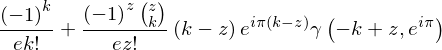

In [13]:
ss.doit().simplify().subs({alpha:1})

checking *Equation 11*:

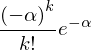

In [35]:
ss.subs({z-1:oo}).doit()

which is the expansion of $e^{\alpha}$ as required.

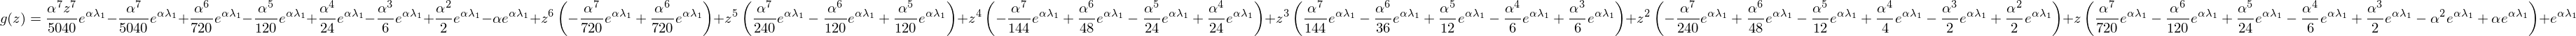

In [14]:
g_expt = g_poly(f_expt, eigendata, Phi_polynomials)
g_expt

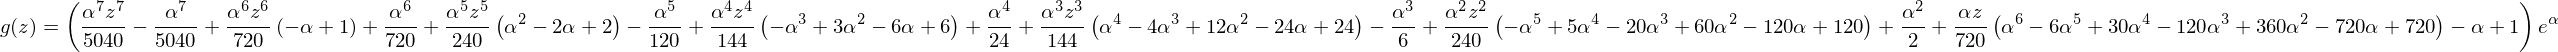

In [31]:
g_expt = g_expt.subs(eigenvals)
simp_g_expt = Eq(g_expt.lhs, exp(alpha)*(g_expt.rhs/exp(alpha)).simplify().collect(z))
simp_g_expt

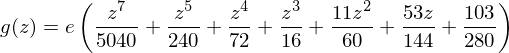

In [32]:
simp_g_expt.subs({alpha:1})

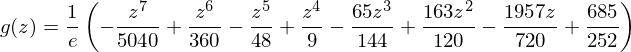

In [33]:
simp_g_expt.subs({alpha:-1})

# `log` function

In [26]:
f = Function('f')
f_log = define(let=f(z), be=ln(z))
f_log

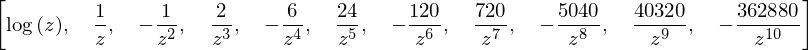

In [27]:
[f_log.rhs.diff(z, i) for i in range(11)]

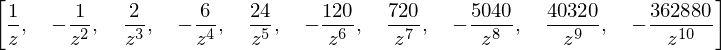

In [28]:
[(-1)**i*factorial(i)/z**(i+1) for i in range(10)]

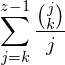

In [29]:
ss = Sum(binomial(j, k)/j, (j, k, z-1))
ss

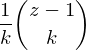

In [30]:
ss.doit()

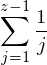

In [31]:
ss = Sum(1/j, (j, 1, z-1))
ss

In [32]:
ss.doit()

checking *Equation 11*:

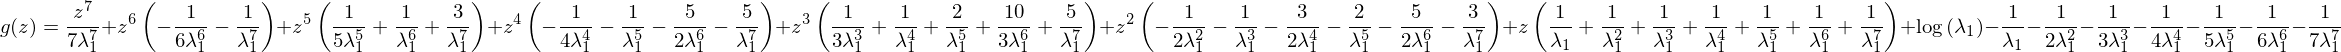

In [33]:
g_log = g_poly(f_log, eigendata, Phi_polynomials)
g_log

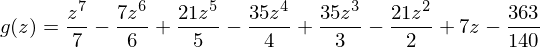

In [34]:
g_log = g_log.subs(eigenvals)
g_log

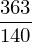

In [36]:
harmonic(7)

Checking *Equation 14*

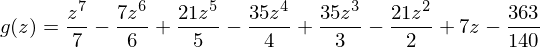

In [37]:
g = define(Function('g')(z),  - (sum(S(1)/k*binomial(m-1, k)*(-z)**(k) for k in range(1, m)) + harmonic(m-1)))
g

In [38]:
Eq(g_log.rhs, g.rhs)

# `sin` function

In [77]:
f = Function('f')
f_sin = Eq(f(z), sin(z))
f_sin

In [78]:
[f_sin.rhs.diff(z, i) for i in range(m)]

In [79]:
(1/(1+t**2)).series(t, n=2*m)

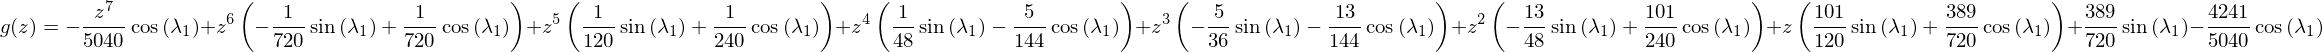

In [80]:
g_sin = g_poly(f_sin, eigendata, Phi_polynomials)
g_sin

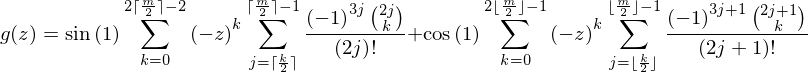

In [81]:
m_sym = symbols('m')
g_poly_theo = Eq(Function('g')(z),
                 sin(1)*(Sum(Sum((-1)**(3*j)/factorial(2*j)*binomial(2*j, k),
                              (j, ceiling(k/2), ceiling(m_sym/2)-1))*(-z)**(k),
                          (k,0,2*ceiling(m_sym/2)-2))) + 
                 cos(1)*(Sum(Sum((-1)**(3*j+1)/factorial(2*j+1)*binomial(2*j+1, k),
                              (j, floor(k/2), floor(m_sym/2)-1))*(-z)**(k),
                          (k,0,2*floor(m_sym/2)-1))))
g_poly_theo

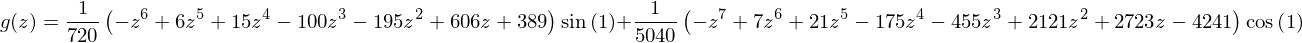

In [82]:
g_poly_theo_m = g_poly_theo.subs({m_sym:m}).doit().simplify()
g_poly_theo_m

In [83]:
assert g_sin.rhs.subs(eigenvals).expand() == g_poly_theo_m.rhs.expand()

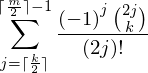

In [152]:
sin_generic_term = Sum((((-1)**(j)/(factorial(2*j))*binomial(2*j,k))), (j, ceiling(k/2), ceiling(m_sym/2)-1))
sin_generic_term

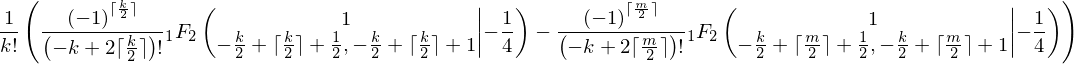

In [154]:
sin_generic_term.doit().simplify()

# `cos` function

In [84]:
f = Function('f')
f_cos = Eq(f(z), cos(z))
f_cos

In [85]:
[f_cos.rhs.diff(z, i) for i in range(m)]

In [86]:
(1/(1+t**2)).series(t, n=2*m)

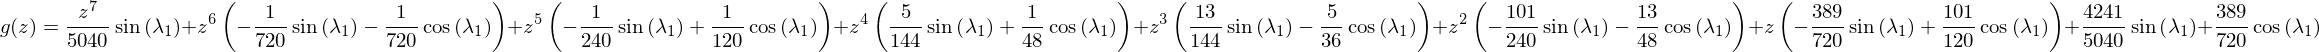

In [87]:
g_cos = g_poly(f_cos, eigendata, Phi_polynomials)
g_cos

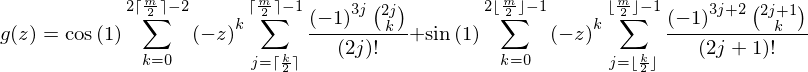

In [88]:
m_sym = symbols('m')
g_poly_theo = Eq(Function('g')(z),
                 cos(1)*(Sum(Sum((-1)**(3*j)/factorial(2*j)*binomial(2*j, k),
                              (j, ceiling(k/2), ceiling(m_sym/2)-1))*(-z)**(k),
                          (k,0,2*ceiling(m_sym/2)-2))) + 
                 sin(1)*(Sum(Sum((-1)**(3*j+2)/factorial(2*j+1)*binomial(2*j+1, k),
                              (j, floor(k/2), floor(m_sym/2)-1))*(-z)**(k),
                          (k,0,2*floor(m_sym/2)-1))))
g_poly_theo

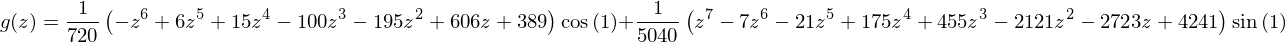

In [89]:
g_poly_theo_m = g_poly_theo.subs({m_sym:m}).doit().simplify()
g_poly_theo_m

In [90]:
assert g_cos.rhs.subs(eigenvals).expand() == g_poly_theo_m.rhs.expand()

# $\Gamma$ function

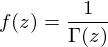

In [61]:
f = Function('f')
f_gamma = Eq(f(z), 1/gamma(z))
f_gamma

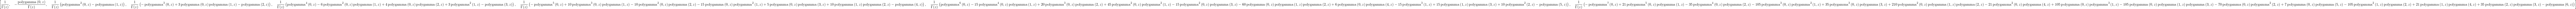

In [62]:
[f_gamma.rhs.diff(z, i) for i in range(m)]

In [63]:
polygamma(2,1).rewrite(harmonic)

In [64]:
g_gamma = Hermite_interpolation_polynomial(f_gamma, eigendata, Phi_polynomials)
#g_gamma # too long and verbose to show leaving $|lambda_{1}$ abstract

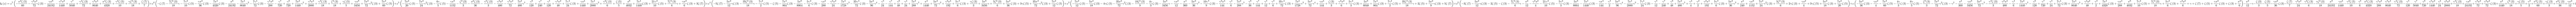

In [65]:
g_gamma = g_gamma.subs(eigenvals).rewrite(harmonic)
g_gamma

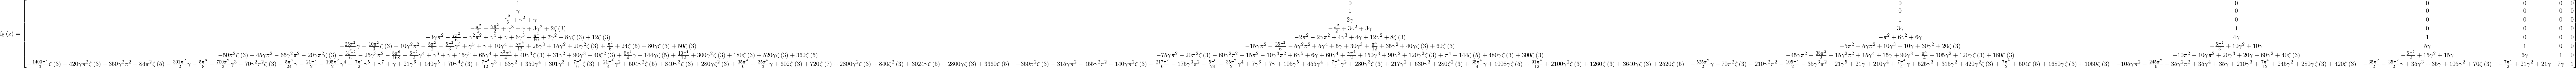

In [66]:
with lift_to_matrix_function(g_gamma) as Ggamma:
    P = Eq(z, Matrix(m, m, binomial), evaluate=False)
    P_gamma = Ggamma(P)
P_gamma

# `M` function

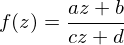

In [94]:
f = Function('f')
a, b, c, d = symbols("a b c d", int=True)
f_mobius = Eq(f(z), (a*z+b)/(c*z+d))
f_mobius

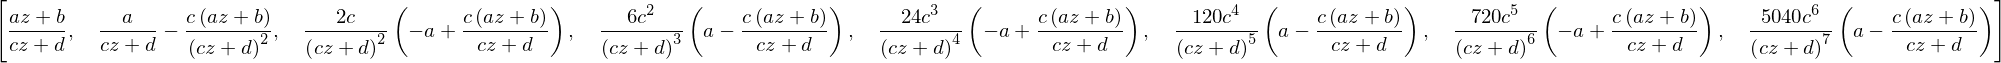

In [95]:
[f_mobius.rhs.diff(z, i) for i in range(m)]

In [96]:
g_mobius = Hermite_interpolation_polynomial(f_mobius, eigendata, Phi_polynomials)
g_mobius = g_mobius.subs(eigenvals)
#g_mobius # too long to show

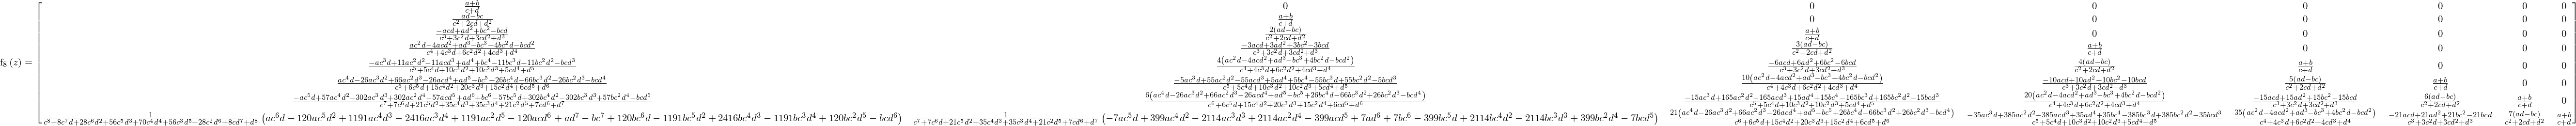

In [97]:
with lift_to_matrix_function(g_mobius) as G_mobius:
    P = Eq(z, Matrix(m,m, binomial), evaluate=False)
    P_mobius = G_mobius(P)
P_mobius

# `M` function

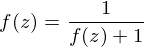

In [98]:
f = Function('f')
f_cont = Eq(f(z), 1/(1+f(z)))
f_cont

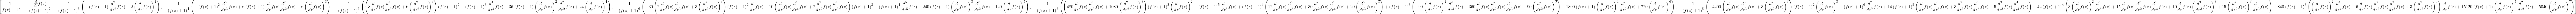

In [100]:
[f_cont.rhs.diff(z, i).simplify() for i in range(m)]

In [102]:
g_cont = Hermite_interpolation_polynomial(f_cont, eigendata, Phi_polynomials)
g_cont = g_cont.subs(eigenvals)
#g_cont
#g_mobius # too long to show

In [105]:
with lift_to_matrix_function(g_cont) as G_cont:
    P = Eq(z, Matrix(m,m, binomial), evaluate=False)
    P_cont = G_cont(P)
#print(P_cont)

# `normal` function

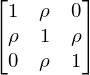

In [19]:
m=3
rho = symbols(r'\rho')
R = Matrix(m, m, lambda n,k: 1 if n == k else rho if abs(k-n) == 1 else 0)
R

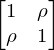

In [32]:
m=2
rho = symbols(r'\rho')
R = Matrix(m, m, lambda n,k: 1 if n == k else rho if abs(k-n) == 1 else 0)
R

In [33]:
data, eigenvals, multiplicities = eigendata = eigen_data(R)
eigendata

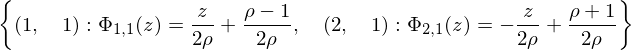

In [34]:
Phi_polynomials = component_polynomials(eigendata, early_eigenvals_subs=True)
Phi_polynomials

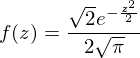

In [35]:
f = Function('f')
f_geometric = define(let=f(z), be=exp(-z**2/2)/sqrt(2*pi))
f_geometric

In [89]:
integrate?

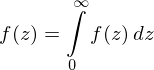

In [92]:
f = Function('f')
f_geometric = Eq(f(z), f(z).integrate((z,0,oo)), evaluate=False)
f_geometric

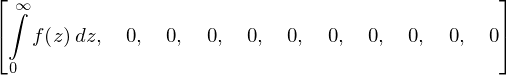

In [93]:
[f_geometric.rhs.diff(z, i) for i in range(11)]

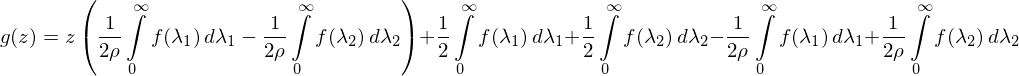

In [94]:
g_geometric = g_poly(f_geometric, eigendata, Phi_polynomials)
g_geometric

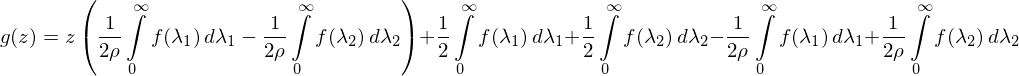

In [95]:
g_geometric_v = g_geometric.subs(eigenvals)
g_geometric_v

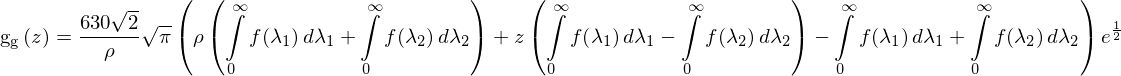

In [96]:
g_g = Eq(Function('g_g')(z), (g_geometric_v.rhs.radsimp()*(2520*sqrt(pi)*exp(1/S(2))/sqrt(2))).radsimp().simplify())
g_g

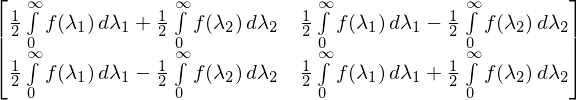

In [106]:
P = Matrix(m, m, binomial)
with lift_to_matrix_function(g_geometric_v) as G_geometric:
    P_geometric = G_geometric(R)
P_geometric
#P_geometric*(2520*sqrt(pi)*exp(1/S(2))/sqrt(2))**(-1)

In [112]:
(Integral(exp(-z), (z, 0,oo))/2).doit()

In [109]:
P_geometric.subs({f: Lambda(t, exp(-t))})

TypeError: 'property' object is not iterable

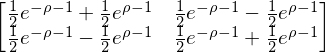

In [72]:
_.doit()

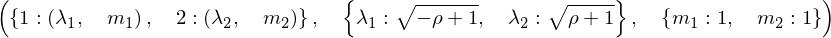

In [63]:
eigen_data(_)

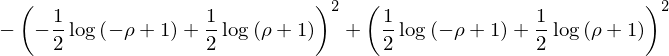

In [59]:
det(_)

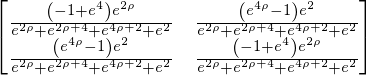

In [57]:
P_geometric.subs({f: Lambda(z, tanh(z))}).applyfunc(lambda i: i.rewrite(exp).simplify())

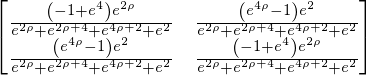

In [57]:
P_geometric.subs({f: Lambda(z, tanh(z))}).applyfunc(lambda i: i.rewrite(exp).simplify())

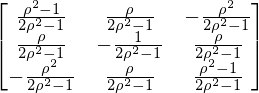

In [28]:
P_geometric.subs({f: Lambda(z, 1/z)}).applyfunc(simplify)

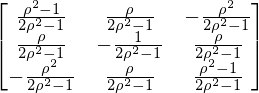

In [30]:
(R**(-1)).applyfunc(simplify)

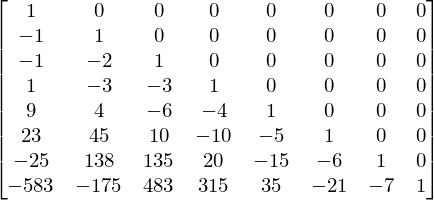

In [56]:
_*(2*sqrt(pi)*exp(1/S(2))/sqrt(2))

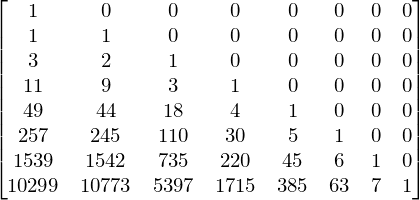

In [57]:
_**(-1)

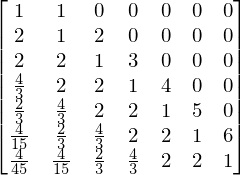

In [58]:
production_matrix(_, exp=True)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.